# Precipitation variability and change
* Wenchang Yang (wenchang@princeton.edu)
* Princeton University

In [59]:
import xarray as xr, pandas as pd, cmocean

import xlearn

from geoplots import mapplot

%matplotlib notebook

## GPCP data

In [48]:
ncfile = '/home/wenchang/tigress/data/gpcp/v2p3/precip.mon.mean.nc'
gpcp = xr.open_dataset(ncfile).precip.sel(time=slice('1979', '2017'))
da = gpcp
da

<xarray.DataArray 'precip' (time: 468, lat: 72, lon: 144)>
[4852224 values with dtype=float32]
Coordinates:
  * lat      (lat) float32 -88.75 -86.25 -83.75 -81.25 -78.75 -76.25 -73.75 ...
  * lon      (lon) float32 1.25 3.75 6.25 8.75 11.25 13.75 16.25 18.75 21.25 ...
  * time     (time) datetime64[ns] 1979-01-01 1979-02-01 1979-03-01 ...
Attributes:
    long_name:     Average Monthly Rate of Precipitation
    valid_range:   [   0.  100.]
    units:         mm/day
    precision:     32767
    var_desc:      Precipitation
    dataset:       GPCP Version 2.3 Combined Precipitation Dataset
    level_desc:    Surface
    statistic:     Mean
    parent_stat:   Mean
    actual_range:  [  0.00000000e+00   9.96920997e+36]

<IPython.core.display.Javascript object>


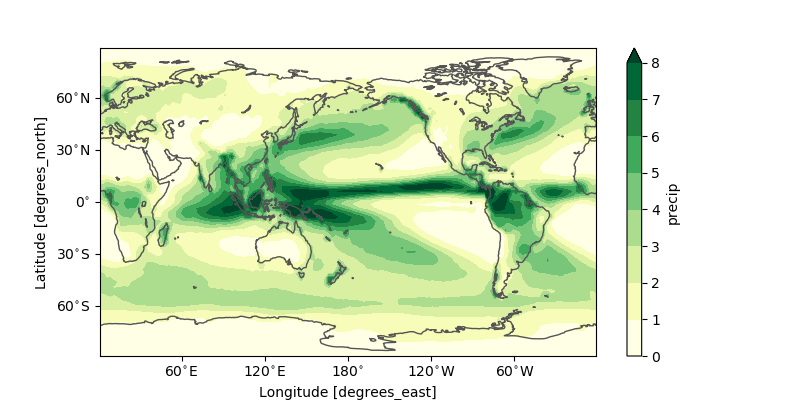

In [55]:
da.mean('time').plot.contourf(robust=True, levels=10, figsize=(8,4), cmap='YlGn')

mapplot()

<IPython.core.display.Javascript object>


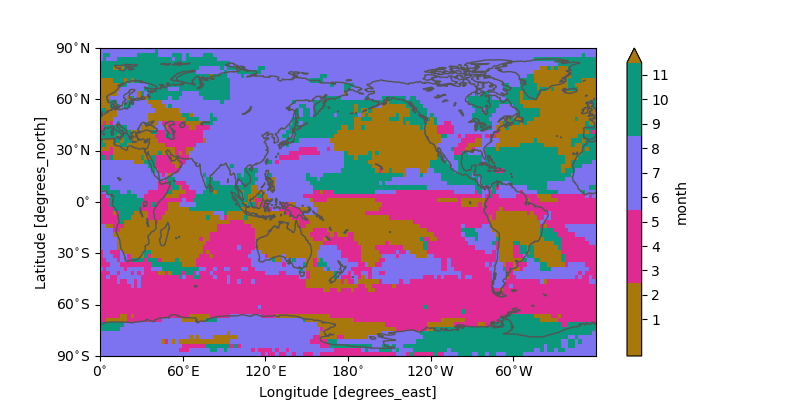

In [62]:
da = gpcp.groupby('time.month').mean('time')
da = da.argmax('month').pipe(lambda x: da.month[x])
da.plot(levels=np.arange(-.5, 12.5, 3), 
        cmap=cmocean.cm.phase, 
        figsize=(8,4),
        cbar_kwargs={'ticks': range(1,13)})

mapplot()

plt.gca().set_title

<IPython.core.display.Javascript object>


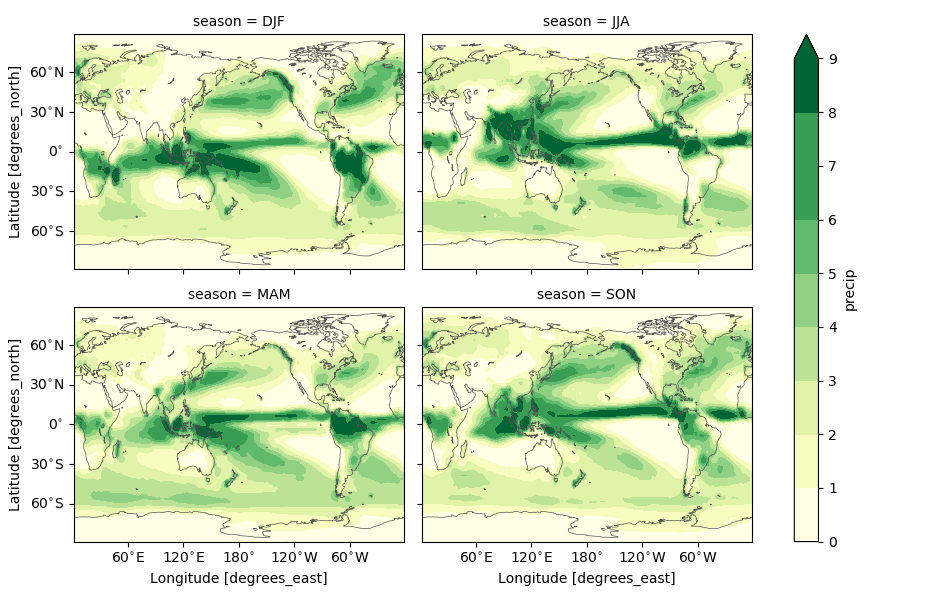

In [49]:
f = da.groupby('time.season').mean('time').plot.contourf(col='season', col_wrap=2, 
                                                cmap='YlGn', 
                                                robust=True, 
                                                aspect=1.4,
                                                levels=10)
for ax in f.axes.flat:
    mapplot(ax=ax, linewidth=0.5)

## CHIRPS data

In [257]:
topo = xr.open_dataarray('/tigress/wenchang/data/topo.nc')
def show_topo(ax=None):
#     pass
    if ax is None:
        ax = plt.gca()
    topo.where(topo>=0).sel(lon=slice(79,82), lat=slice(5,11)).plot.contour(levels=range(200,1001,200), 
                                                                            colors='k',
                                                                           alpha=.5,
                                                                           ax=ax)
# show_topo()

In [92]:
ds = xr.open_dataset('/tigress/wenchang/analysis/SriLanka/chirps.p05.SriLanka.nc').sel(time=slice(None, '2017'))

<IPython.core.display.Javascript object>


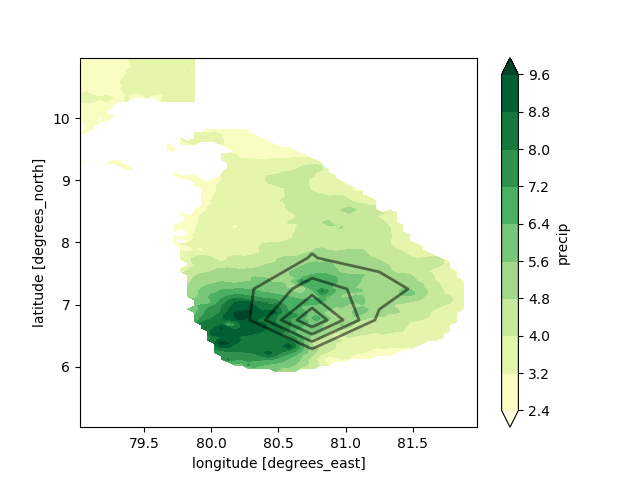

In [138]:
ds.precip.mean('time').plot.contourf(robust=True, levels=10, cmap='YlGn')
show_topo()

<IPython.core.display.Javascript object>


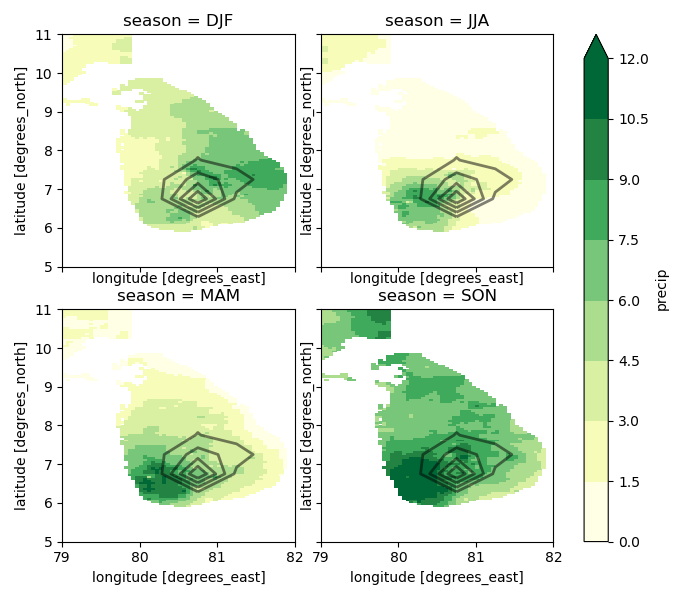

In [141]:
f = ds.precip.groupby('time.season').mean('time') \
    .plot(col='season', col_wrap=2, robust=True, levels=10, cmap='YlGn')
for ax in f.axes.flat:
    title = ax.get_title()
    show_topo(ax=ax)
    ax.set_title(title)

<IPython.core.display.Javascript object>


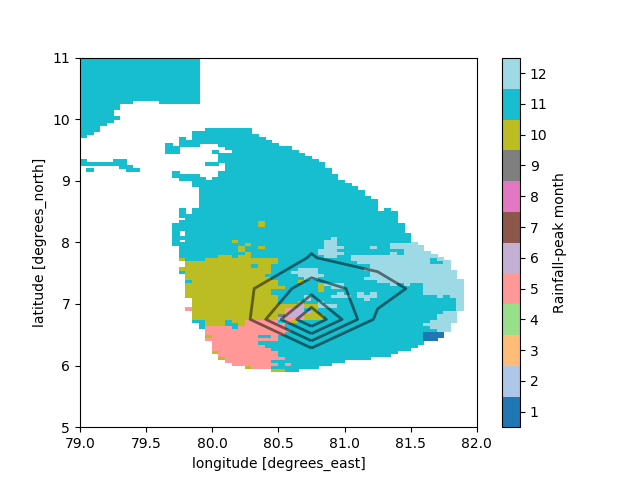

In [178]:
da = ds.precip.groupby('time.month').mean('time')
da = da.fillna(0).argmax('month').pipe(lambda x: da.month[x] + da.mean('month')*0)
da.rename('Rainfall-peak month').plot(levels=np.arange(.5, 12.6), cmap='tab20', 
                                      cbar_kwargs={'ticks': np.arange(1,13)})
show_topo()

<IPython.core.display.Javascript object>


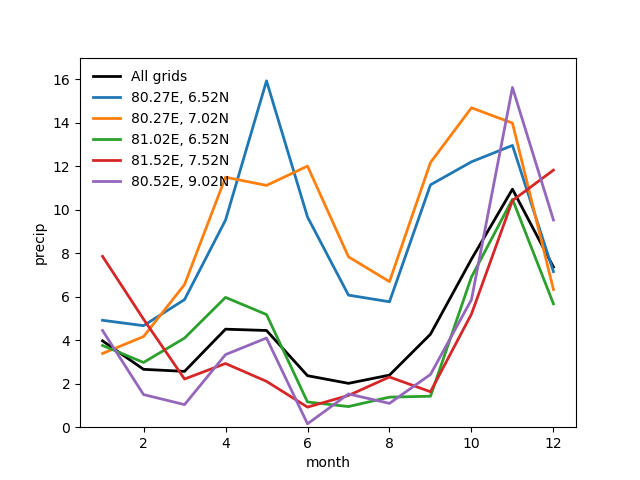

Text(0.5,1,'')

In [258]:
da = ds.precip.mean(['longitude', 'latitude']).groupby('time.month').mean('time')
da.plot(label='All grids', color='k')

lon, lat = 80.25, 6.5
da = ds.precip.sel(longitude=lon, latitude=lat, method='nearest').groupby('time.month').mean('time')
da.plot(label=f'{da.longitude.item():.2f}E, {da.latitude.item():.2f}N')

lon, lat = 80.25, 7
da = ds.precip.sel(longitude=lon, latitude=lat, method='nearest').groupby('time.month').mean('time')
da.plot(label=f'{da.longitude.item():.2f}E, {da.latitude.item():.2f}N')

lon, lat = 81, 6.5
da = ds.precip.sel(longitude=lon, latitude=lat, method='nearest').groupby('time.month').mean('time')
da.plot(label=f'{da.longitude.item():.2f}E, {da.latitude.item():.2f}N')

lon, lat = 81.5, 7.5
da = ds.precip.sel(longitude=lon, latitude=lat, method='nearest').groupby('time.month').mean('time')
da.plot(label=f'{da.longitude.item():.2f}E, {da.latitude.item():.2f}N')

lon, lat = 80.5, 9
da = ds.precip.sel(longitude=lon, latitude=lat, method='nearest').groupby('time.month').mean('time')
da.plot(label=f'{da.longitude.item():.2f}E, {da.latitude.item():.2f}N')


plt.legend()

plt.ylim(0, 17)
plt.title('')

<IPython.core.display.Javascript object>


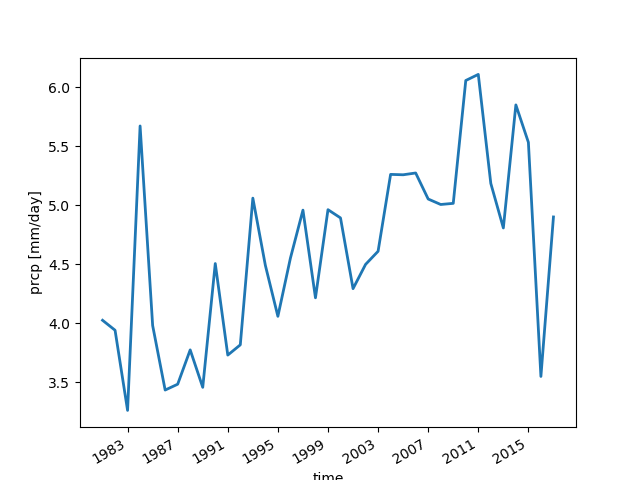

In [251]:
da = ds.precip.mean(['longitude', 'latitude']).resample(time='AS').mean('time')
da.rename('prcp [mm/day]').plot(label='Annual')

<IPython.core.display.Javascript object>


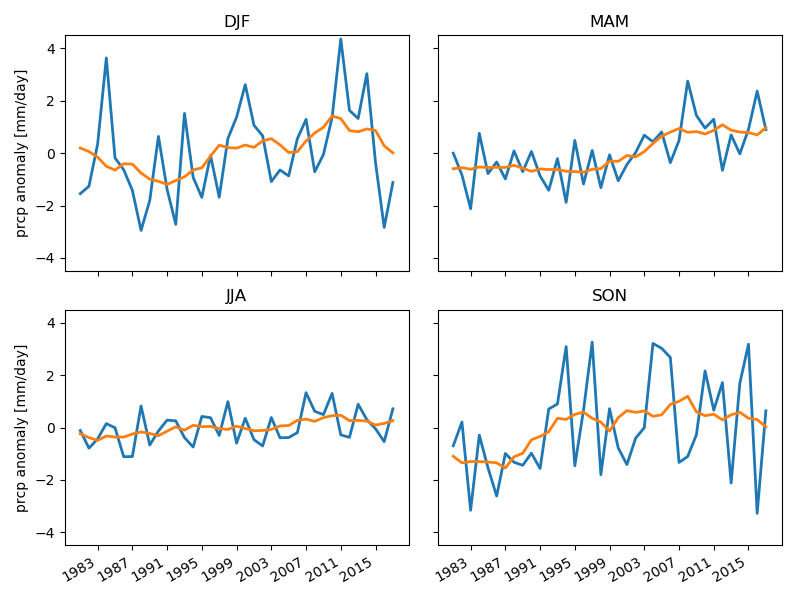

In [253]:
fig, axes = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(8, 6))

seasons = ['DJF', 'MAM', 'JJA', 'SON']
for ax, season in zip(axes.flat, seasons):
    da = ds.precip.mean(['longitude', 'latitude']).isel(time=ds.time.dt.season==season).resample(time='AS').mean('time')
    da = da.pipe(lambda x: x - x.mean())
    da.plot(label=season, ax=ax)
    da.rolling(time=9, center=True, min_periods=1).mean().plot(ax=ax)
#     ax.legend(loc='lower left')
    ax.set_title(season)
    ax.set_xlabel('')
    ax.set_ylabel('')
    
    if season in ('DJF', 'JJA'):
        ax.set_ylabel('prcp anomaly [mm/day]')

plt.ylim(-4.5, 4.5)
plt.tight_layout()

<IPython.core.display.Javascript object>


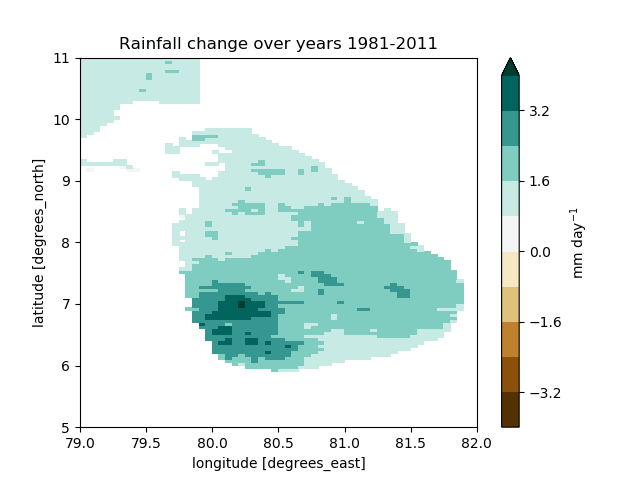

Text(0.5,1,'Rainfall change over years 1981-2011')

In [218]:
year0, year1 = 1981, 2011
da = ds.precip.sel(time=slice(f'{year0}', f'{year1}')).resample(time='AS').mean('time')
m = da.learn.regress(da['time.year'])

da = m.coef_da.pipe(lambda x: x*(year1-year0)).rename('mm day$^{-1}$')
da.plot(cmap='BrBG', robust=True, levels=10, center=0)
plt.title(f'Rainfall change over years {year0}-{year1}')

<IPython.core.display.Javascript object>


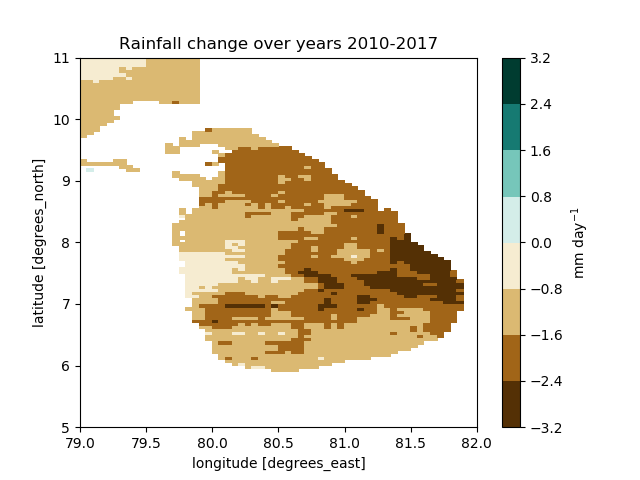

Text(0.5,1,'Rainfall change over years 2010-2017')

In [219]:
year0, year1 = 2010, 2017
da = ds.precip.sel(time=slice(f'{year0}', f'{year1}')).resample(time='AS').mean('time')
m = da.learn.regress(da['time.year'])

da = m.coef_da.pipe(lambda x: x*(year1-year0)).rename('mm day$^{-1}$')
da.plot(cmap='BrBG', robust=True, levels=10, center=0)
plt.title(f'Rainfall change over years {year0}-{year1}')

In [250]:
%%html
<script src="https://cdn.rawgit.com/parente/4c3e6936d0d7a46fd071/raw/65b816fb9bdd3c28b4ddf3af602bfd6015486383/code_toggle.js">
</script>